# Das multiple lineare Regressionmodell

Eines der einfachsten Modelle der Datenanalyse für numerische Variablen ist das lineare Regressionsmodell. Meist wird in den einführenden Statistikveranstaltungen eines Studiums das lineare Regressionsmodell mit einer unabängigen Variablen besprochen. Wir betrachten den allgemeineren Fall des linearen Regressionsmodells mit mehreren (bei uns $p$ Variablen) unabhängigen Variablen:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon =  \boldsymbol{\beta}^T \boldsymbol{x} + \epsilon
$$

In der Gleichung entspricht $ \boldsymbol{\beta} = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{pmatrix}$ und $ \boldsymbol{x} = \begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_p \end{pmatrix}$ 

```{note}
Notation: In einführenden Statistikveranstaltungen wird oft zwischen der Zufallsvariablen $Y$ und einer Realisierung $y$ durch Groß- und Kleinschreibung unterschieden. Um die Notation möglichst schlank zu halten, verzichten wir auf diese Konvention und entnehmen dem Kontext, ob es sich um das Konzept der Zufallsvariablen oder um eine Realisierung einer Variablen handelt. Zudem verwende ich öfter die Vektor- bzw. Matrixschreibweise, um formalle Darstellungen kompakt zu halten. Fettgedruckte Kleinbuchstaben entsprechen Vektoren, fettgedruckte Großbuchstaben entsprechen Matrizen. 
```

Wie der Name impliziert, können durch das lineare Regressionmodell lediglich lineare Zusammenhänge erfasst werden. D.h. im Fall der einfachen linearen Regression entspricht die Funktion einer Geraden, mit zwei Variablen einer Ebene und im allgemeinen Fall einer sogenannten Hyperebene. Charakteristisch für den linearen Zusammenhang ist es, dass der Anstieg um eine Einheit einer unabhängigen Variable immer zu einer konstanten Erhöhung der abhängigen Variable führt, unabhängig davon welchen Wert die unabhängigen Variable in ihrem Wertebereich gerade annimmt. Beispielsweise erhöhrt sich der Umsatz $y$ eines Unternehmens immer um $\beta x $, egal ob x gerade ein kleiner Wert oder ein großer Wert ist. 

Dennoch kann durch die Wahl der Parameter $\boldsymbol{\beta}$ das Modell angepasst werden. In der unteren Zelle sehen wir den Einluss der konstanten $\beta_0$, durch die es zu einer paralellen Verschiebung der Linie im einfachen Regressionsmodell kommt. Zudem kann durch die Wahl von $\beta_1$ die Steigung der Geraden manipuliert werden. Letzteres trifft auf stetige bzw. ordinale unabhängige Variablen zu. Handelt es sich bei $x$ um eine kategoriale Variable wird erneut die Gerade parallel nach oben oder unten verschoben. Der Wert der $\beta_j$ Parameter lässt Rückschlüsse auf den möglichen Einfluss der jeweiligen unabhängigen Variablen zu. Ist der Wert beispielsweise $0$, so kann von keinem Einfluss der jeweiligen Variablen ausgegangen werden. Positiven (negative) Werte hingegen sind ein Indiz für einen möglichen Zusammenhang. Der Vollständigkeit halber sei erwähnt, dass das Modell erst mit einer Annahme über die Residuen $\epsilon$ vollständig ist. Diese Annahme hat Einfluss auf die statistische Inferenz der geschätzen Einflüsse. In diesem Kurs fokussieren wir uns jedoch weniger auf die statistische Inferenz, sondern vielmehr auf die Schätzung der Punktschätzer der Parameter, weswegen wir nicht näher auf die Annahme zu $\epsilon$ und den damit verbundenen Wahrscheinlichkeitstheoretischen Folgerungen eingehen. 

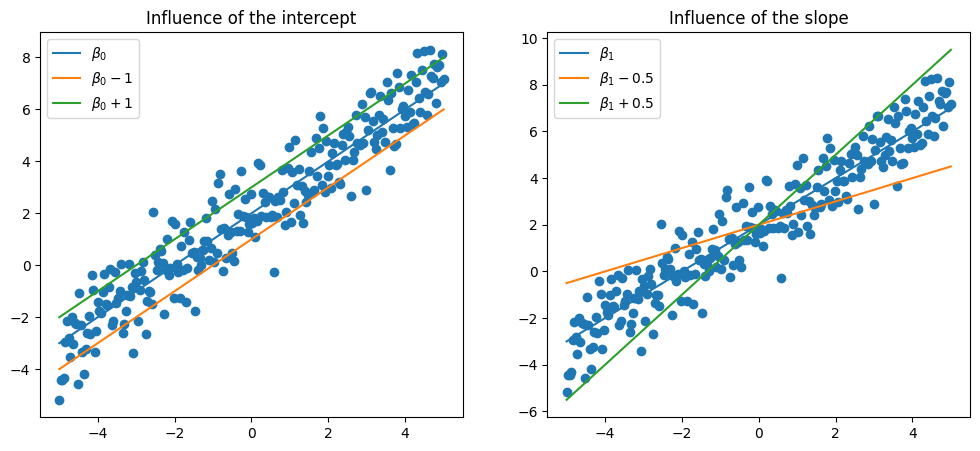

In [1]:
import numpy as np
import matplotlib.pylab as plt

b0 = 2.
b1 = 1.

x1 = np.linspace(-5, 5, 250)
e = np.random.normal(size = 250)

y1 = b0 + b1*x1 + e

fig, axs = plt.subplots(1, 2, figsize = (12, 5))

axs[0].scatter(x1, y1)
axs[0].plot(x1, b0 + b1*x1, label = r"$\beta_0$")
axs[0].plot(x1, b0 - 1. + b1*x1, label = r"$\beta_0 - 1$")
axs[0].plot(x1, b0 + 1. + b1*x1, label = r"$\beta_0 + 1$")
axs[0].legend()
axs[0].set_title("Influence of the intercept")

axs[1].scatter(x1, y1)
axs[1].plot(x1, b0 + b1*x1, label = r"$\beta_1$")
axs[1].plot(x1, b0 + (b1 - 0.5)*x1, label = r"$\beta_1 - 0.5$")
axs[1].plot(x1, b0 + (b1 + 0.5)*x1, label = r"$\beta_1 + 0.5$")
axs[1].legend()
axs[1].set_title("Influence of the slope")
plt.show()

Anzumerken ist, dass auch mittels des Regressionsmodells nicht-lineare Zusammenhänge abgebildet werden können, wenn die Variablen auf nicht lineare Art transformiert werden. Vermuten wir beispielsweise einen eher quadratischen Zusammenhang zwischen der $x$ und $y$, so können wir $x^2$ mit ins Modell aufnehmen. Die Auswirkung auf die funktionale Form des Modells kann in der nächsten Zelle betrachtet werden. Bei diesem Ansatz handelt es sich um die polynomiale Regression, ber der selbstverständlich auch höhere Polynome als Funktion aufgenommen werden können. Hierbei weichen wir jedoch bereits vom traditionellen linearen Regressionsmodell ab. Die polynomiale Regression ist eine von mehreren Alternative zum linearen Regressionsmodell, welche durch die Erhöhung der Komplexität des Modells eine höhere Flexibilität erzeugt. Dies ist jedoch oft auch mit Herausforderungen verbunden, welche erst später im Kurs diskutiert werden sollen.

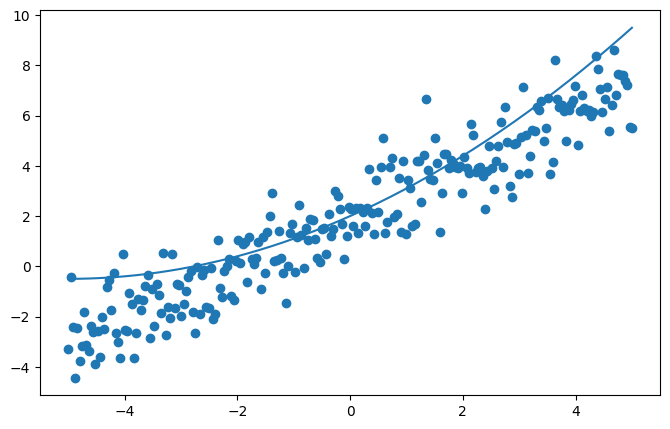

In [2]:
import numpy as np
import matplotlib.pylab as plt

b0 = 2.
b1 = 1.

x1 = np.linspace(-5, 5, 250)
e = np.random.normal(size = 250)

y1 = b0 + b1*x1 + e

fig, axs = plt.subplots(figsize = (8, 5))

axs.scatter(x1, y1)
axs.plot(x1, b0 + b1 * x1 + 0.1*x1**2)
plt.show()

## Trainieren des linearen Regressionsmodells

Im vorherigen Abschnitt haben wir bereits kurz erwähnt, dass die Werte der Parameter $\boldsymbol{\beta}$ maßgeblich für die Interpretation und Analyse möglicher Einflüsse der unabhängigen Variablen sind. Die hiermit verbundene wichtige Frage ist, was bei gegebenen Daten sinnvolle Werte für $\boldsymbol{\beta}$ sind? Da das Modell das Zustandekommen der realen Zusammenhänge möglichst gut abbilden soll, werden in der Regel die Daten einer Stichprobe verwendet, um die Modellparameter so zu schätzen, dass die vorliegende Stichprobe möglichst gut durch das Modell erklärt wird. Im besten Fall erhält man auf diese Weise ein Modell, welches ebenso gut für neue Stichproben funktioniert. Gelingt dies, kann man davon ausgehen, dass das Modell im allgemeinen geeignet ist, um die Zusammenhänge für die vorliegende Aufgabenstellung abzubilden. 

Um ein Modell auf gegebene Daten möglichst gut anzupassen wird versucht, die Parameter so festzulegen, dass die Prognosen des Modells möglichst nahe an den realen Beobachtungen liegen. Gelingt dies, kann davon gesprochen werden, dass durch das Modell das Zustandekommen der Daten möglichst gut erklärt wird. Um zu lernen, wie dieser Vorgang bewältigt wird, starten wir zunächst mit einem einfachen (jedoch unrealistischen) Beispiel. Gegeben sei eine Beobachtung $y = 3$ mit der Beobachtung einer unabhängigen Variablen $x = 2$. Die Gleichung der Regressionsgeraden sei: 

$$
f(x) = \beta \cdot x 
$$

Es handelt sich somit um eine Gerade durch den Ursprung des Koordinatensystems deren Steigung durch die Wahl von $\beta$ beinflusst werden kann.

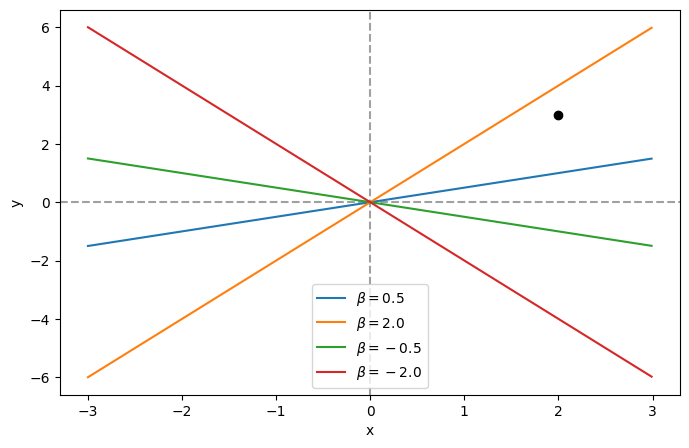

In [3]:
import matplotlib.pylab as plt
import numpy as np


x_range = np.arange(-3, 3, 0.01)
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(2, 3, color = "black")
ax.axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
ax.axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
ax.plot(x_range, 0.5 * x_range, label = r"$\beta = 0.5$")
ax.plot(x_range, 2.0 * x_range, label = r"$\beta = 2.0$")
ax.plot(x_range, -0.5 * x_range, label = r"$\beta = -0.5$")
ax.plot(x_range, -2.0 * x_range, label = r"$\beta = -2.0$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

Um zu überprüfen, wie nahe die Prognose am tatsächlichen Wert liegt, bietet es sich an, zunächst die Differenz $y - f(x)$ zu bestimmen. Da man sich jedoch primär eher dafür interessiert, wie hoch die Abweichung ist und nicht, ob man den tatsächlichen Wert gerade unter- oder überschätzt, wird vielmehr der absolute Wert $|y - f(x)|$ oder die quadratische Abweichung $\left(y - f(x)\right)^2$ verwendet, um zu quantifizieren, wie weit Realisierung und Schätzung des Modells voneinander entfernt sind. Die quadratische Abweichung hat mathematisch nützlichere Eigenschaften, weshalb diese meist verwendet wird. Die die Schätzung des Modells vom Parameter $\beta$ abhängt, wollen wir die Kosten- bzw. Verlustfunktion definieren:

$$
L\left(y, f_{\beta}(x) \right) = \left(y - f_{\beta}(x)\right)^2
$$

In unserem Beispiel können wir direkt die Werte einsetzen:

$$
L\left(y, f_{\beta}(x) \right) = \left(3 - \beta \cdot 2\right)^2
$$

In der unteren Grafik sehen wir den Zusammenhang zwischen verschiedenen Werten für $\beta$ und der Lossfunktion $L\left(y, f_{\beta}(x) \right)$. Wünschenswert ist ein möglichst geringer Wert für $L\left(y, f_{\beta}(x) \right)$, da hiermit eine möglichst gerine Abweichung zwischen Prognose des Modells und dem realisierten Wert einhergeht. Mathematisch befinden wir uns somit in einem Optimierungs-, genauer, Minimierungsproblem, bei dem es darum geht durch die Wahl von $\beta$ die Funktion $L\left(y, f_{\beta}(x) \right)$ zu minimieren. Für unser Beispiel können wir dieses Problem relativ leicht lösen, in dem wir mögliche Extremstellen der Funktion mittels ableiten und null setzen bestimmen und im nächsten Schritt durch die zweite Ableitung überprüfen, ob es sich bei den Extremstellen um ein Minimum, Maximum oder einen Wendepunkt handelt.

$$
\begin{aligned}
\frac{\partial L}{\partial \beta} = 2 (3 - \beta \cdot 2) \cdot (-2) \stackrel{!}{=} 0 \\
-12 + 8 \cdot \beta = 0 \\
\beta = \frac{3}{2}
\end{aligned}
$$

$$
\frac{\partial^2 L}{\partial^2 \beta} = 8 > 0
$$

Wir sehen, dass es sich bei der Lösung $\beta = \frac{3}{2}$ um ein Minimum handelt. Die entsprechende Linie geht in unserem Beispiel direkt durch den Punkt $(2, 3)$ womit wir für diese eine Beobachtung eine exakte Prognose erhalten.

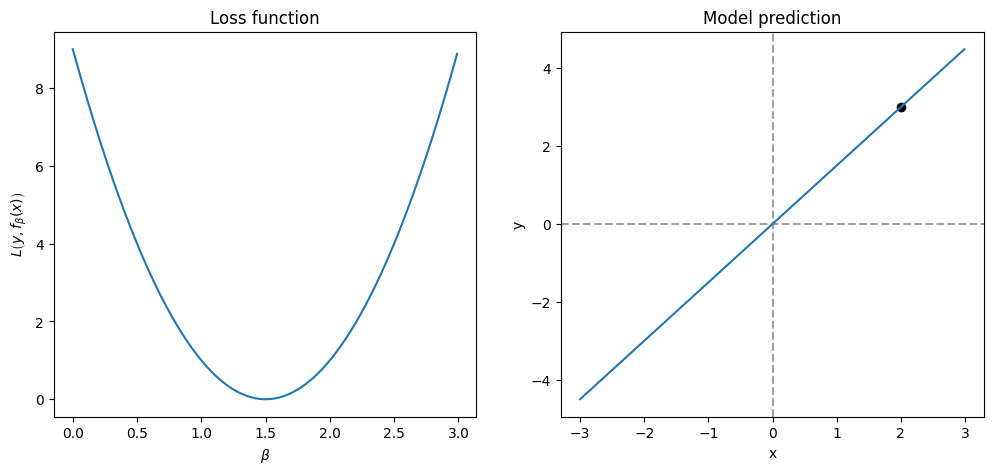

In [4]:
import matplotlib.pylab as plt
import numpy as np


x = 2
y = 3
L = lambda beta: (y - beta * x)**2
beta_range = np.arange(0, 3, 0.01)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(beta_range, L(beta_range))
axs[0].set_xlabel(r"$\beta$")
axs[0].set_ylabel(r"$L\left(y, f_{\beta}(x) \right)$")
axs[0].set_title("Loss function")

x_range = np.arange(-3, 3, 0.01)
axs[1].scatter(2, 3, color = "black")
axs[1].axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].plot(x_range, 1.5 * x_range, label = r"$\beta = 1.5$")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("Model prediction")

plt.show()

Im realistischen Fall mit mehreren Datenpunkten ist es in der Regel nicht möglich perfekte Vorhersagen des Modells zu generieren, egal wie gut die Parameter des Modells gewählt werden. Jedoch können die Parameters des Modells mit der gleichen Logik wie im vorherigen Beispiel bestimmt werden. Fügen wir unserer Stichprobe nebem dem Punkt $(x_1 = 2, y_1 = 3)$ einen weiteren Datenpunkt $(x_2 = 3, y_2 = 2)$ hinzu. Die Lossfunktion wird zu:

$$
\begin{split}
L\left(y, f_{\beta}(\boldsymbol{x}) \right) & = \frac{1}{2} \left( \left(y_1 - f_{\beta}(x_1)\right)^2 +  \left(y_2 - f_{\beta}(x_2)\right)^2 \right) = \\
& = \frac{1}{2} \sum_{i = 1}^2 \left(y_i - f_{\beta}(x_i)\right)^2 = \\
& = \frac{1}{2} \sum_{i = 1}^2 \left(y_i - \beta x_i\right)^2 
\end{split}
$$

Auch wenn die Darstellung durch das Summenzeichen etwas formaler wird, kann ein mögliches Minimum wie vorher durch die erste Ableitung bestimmt werden:

$$
\begin{aligned}
\frac{\partial L}{\partial \beta} = \frac{1}{2} \sum_{i=1}^2 2 \left(y_i - \beta x_i\right) \cdot (-x_i) = \sum_{i=1}^2 \left(y_i - \beta x_i\right) \cdot (-x_i) \stackrel{!}{=} 0 \\
\sum_{i=1}^2 - x_i y_i + \sum_{i=1}^2 \beta x_i^2 = 0 \\
\beta \sum_{i=1}^2 x_i^2 = \sum_{i=1}^2 x_i y_i  \\
\beta = \frac{\sum_{i=1}^2 x_i y_i }{\sum_{i=1}^2 x_i^2 }
\end{aligned}
$$

In unserem Beispiel resultiert hieraus der Wert $\beta = \frac{12}{13}$. Die untere Grafik visualisiert, dass auf diese Weise eine Gerade resultiert, die zwischen den beiden Punkten verläuft. Das Modell versucht auf diese Weise möglichst nahe an beiden Punkten zu sein. 

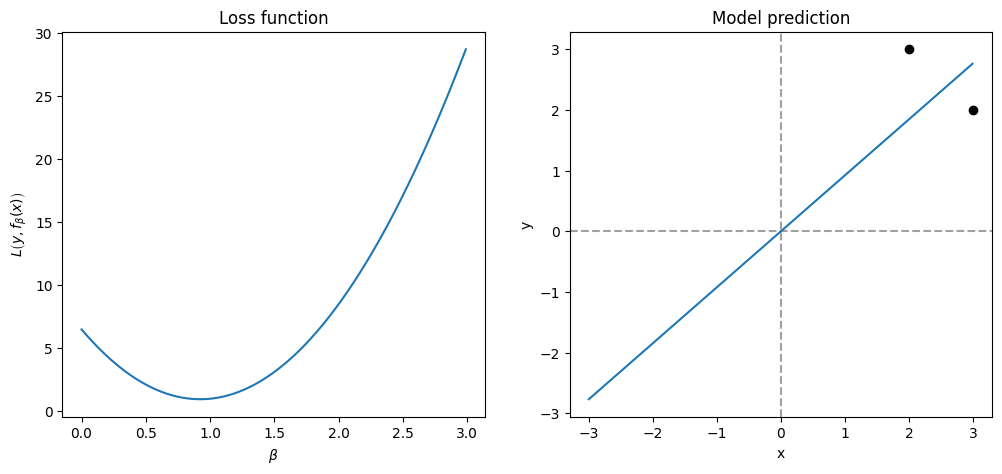

In [5]:
import matplotlib.pylab as plt
import numpy as np

x = np.array([2., 3.])
y = np.array([3., 2.])

L = lambda beta: np.mean((y - beta * x)**2)
beta_range = np.arange(0, 3, 0.01)
losses = np.array([L(beta_) for beta_ in beta_range])

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(beta_range, losses)
axs[0].set_xlabel(r"$\beta$")
axs[0].set_ylabel(r"$L\left(y, f_{\beta}(x) \right)$")
axs[0].set_title("Loss function")

x_range = np.arange(-3, 3, 0.01)
axs[1].scatter(x, y, color = "black")
axs[1].axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].plot(x_range, 12/13 * x_range, label = r"$\beta = 1.5$")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("Model prediction")

plt.show()

Wir halten also fest, dass die Anpassung des Modells der Daten durch mathematische Optimierung erfolgt. Hierbei ist es wichtig zu verstehen, dass die Datenpunkte der Stichprobe $(x_1, y_1), ..., (x_n, y_n)$ unveränderliche Werte sind und die Anpassung des Modells über die Wahl der Parameter erfolgt. Im Allgemeinen Fall mit mehreren Datenpunkten und dem multiplen linearen Regressionsmodell ist die Lossfunktion:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \frac{1}{n} \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2
$$

bzw. da für die Identifikation des Minimums die Konstante $\frac{1}{n}$ unwesentlich ist, wird manchmal auch die Lossfunktion:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2
$$

minimiert. Auch wenn die Minimierung hierfür etwas schwieriger als in unseren einfachen Beispielen wird, können alle Werte für $\boldsymbol{\beta}$ auf analytische Weise bestimmt werden. Diese Lösung ist in allen gängigen statistischen Paketen und Programmen implementiert und wir verzichten an dieser Stelle auf die formale Darstellung. Zuletzt sei an dieser Stelle darauf hingewiesen, dass sich die durch die Minimierung der Lossfunktion bestimmten Parameter normalerweise je Stichprobe unterscheiden. Daher werden die geschätzten Parameter meist mit einem Dach-Symbol wie hier $\hat{\boldsymbol{\beta}}$ versehen, um klar zu machen, dass es sich um Schätzungen aus der Stichprobe und nicht um die wahren Werte der Gesamtpopulation handelt. 

## Schätzunsicherheit

Bevor wir auf ein konkretes Beispiel eingehen, wollen wir uns noch etwas näher mit dem Aspekt der Schätzunsicherheit befassen. In manchen Fällen mag es theoretisch möglich sein, dass man Zugriff auf die Daten der Gesamtpopulation hat und somit den wahren Wert eines Parameters bestimmen kann. Beispielsweise ist es theoretisch möglich die durchschnittliche Körpergröße aller Erwachsenen Bürger eines Landes zu ermitteln. Jedoch scheitert dieses Vorhaben oft an praktischen Aspekten bei der Datensammlung und bei Fragen des wirtschaftlichen Nutzens, da die Erhebung aller Daten oft mit hohen Kosten verbunden ist. Sobald man entsprechend nicht auf alle Werte der Population zurück greift, sondern versucht durch eine Stichprobe den unbekannten Wert der Population zu bestimmen, entsteht die durch die Zufälligkeit der Stichprobenerhebung Unsicherheit beim geschätzten Wert. Wird öfter eine zufällige Stichprobe gezogen, werden sich die zufälligen Realsierungen und somit die geschätzten Parameter je Stichprobe unterscheiden. Betrachten wir das stark vereinfachende Beispiel in der unteren Zelle, sehen wir, dass es bei zufälligen Ziehungen aus einer Population und dem Schätzen des Erwartungswertes durch das arithmetische Mittel zu variierenden und immer vom wahren Wert abweichenden Werten kommt. Ein derartiges Verhalten besteht immer, wenn die Parameter von Modellen anhand von Stichproben geschätzt werden. Je stärker die geschätzten Parameter variieren, umso höher die statistische Unsicherheit und die damit verbundene Inferenz. Wie stark die Parameter variieren lässt sich durch die Standardfehler quantifizieren. Diese werden für die Berechnung wichtiger statistischer Kennzahlen wie das Konfidenzintervall und dem p-value verwendet.

In [6]:
import numpy as np

n = 5

population = np.array([22, 21, 25, 27, 22])
print("The population values are:")
print(population)
print(" ")
idx = np.arange(1, n) - np.tri(n, n-1, k=-1, dtype=bool)

sample_means = population[idx].mean(axis = 1)
true_mean = population.mean()

print("The true mean of the population is:")
print(true_mean)
print(" ")
print("Sample means with leave one out drawing are:")
print(sample_means)

The population values are:
[22 21 25 27 22]
 
The true mean of the population is:
23.4
 
Sample means with leave one out drawing are:
[23.75 24.   23.   22.5  23.75]


Frequentistische statistische Hypothesentests versuchen die Unsicherheit der Parameterschätzung bei der Überprüfung einer Hypothese mit einzubeziehen. Geht man z.B. bei der Null-Hypothese davon aus, dass die Variable $x_1$ keinen von null verschiedenen Einfluss auf die abhängige Variable hat, so kann es durch die Zufälligkeit der Stichprobenziehung natürlich trotzdem passieren, dass $\hat{\beta}_1$ einen von Null verschiedenen Wert annimmt, selbst wenn der wahre Wert $\beta = 0$ ist. Kann man jedoch den Standardfehler des Parameterschätzers bestimmen, ist man in der Lage Grenzwerte festzulegen, ab denen der geschätzte zufällige Werte einer Stichprobe für eine gegebene Hypothese sehr unplausibel erscheint. Neben klassischen Tests werden oft Konfidenzintervalle bei geschätzten Parametern mit angegeben. Je höher der Standardfehler eines Schätzers umso breiter das Intervall, umso weniger konkret der Rückschluss auf den geschätzten Einfluss der zugehörigen Variable. Die genaue Funktionsweise von Hypthesentests und der Umgang mit Konfidenzintervalle sollten Inhalte einführender Statistikveranstaltungen Ihres Studiums sein, jedoch möchte ich Sie mit dieser Diskussion für die Wichtigkeit der statistischen Unsicherheit geschätzter Parameter eines Modells sensibilisieren. Der Blick bei der Analyse eines Modells sollte nicht nur auf den geschätzten Wert, sondern auf desen Unsicherheit gerichtet sein.

In den nächsten beiden Zellen sehen Sie den Auszug eines Datensatzes, bei dem ein möglicher Einfluss des Werbekanals auf die Verkäufe analysiert werden soll. Wir verwenden die OLS Klasse des statsmodels Pakets, um die Parameter der linearen Regression dieses Datensatzes zu schätzen. Im zugehörigen Output erkennen wir, dass ein positiver Einfluss von Fernseh- und Ratiowerbung auf die Verkäufe messbar ist. Das Vorzeichen der News-Variable ist negative, jedoch können wir anhand des p-values erkennen, dass nicht von einem Null verschiedenen Einfluss dieser Variable ausgegangen werden kann. Dies bedeuet, dass es zumindest aus statistischer Sicht keinen Sinn macht, das negative Vorzeichen als negativen Einfluss der Variable zu interpretieren. Im Standard wird bei diesem Output jede Variable einzeln durch einen t-Test auf von null verschiedene statistsche Signifikanz getestet. Dies bedeutet, dass für jede Variable (und auch für die Konstante) die Nullhypothese $\beta = 0$ lautet. Neben den p-values sind die Grenzen der Konfidenzintervalle angegeben. Zudem finden Sie weitere Informationen, wie die Anzahl der Beobachtungen ($n = 200$), den F-Test und Gütemaße wie das $R^2$, Log-Likelihood, AIC und BIC.  

In [7]:
import pandas as pd


advertising_df = pd.read_csv("../Daten/Advertising.csv", index_col= "Unnamed: 0")
advertising_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
import statsmodels.api as sm

X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        20:00:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Um Ihnen noch einmal zu demonstrieren, wie Sie sich die Zufälligkeit der geschätzten Parameter vorstellen können, führen wir für diesen Datensatz ein kleines Experiment in der unteren Zelle durch. Wir behandeln den Datensatz als Gesamtpopulation und ziehen mehrmals Stichproben vom Umfang $n_{\text{sample}} = 100$ aus dieser Population. Jedes Mal schätzen wir die Parameter der Regressionsgeraden und halten diese in einer Tabelle fest. Nach 100 Ziehungen betrachten wir die Histogramme der geschätzten Parameter über alle Stichprobenziehungen. Wir können erkennen, dass die geschätzten Werte der Ziehungen oft nahe an den Werten der gesamten Stichprobe sind, es zum Teil jedoch auch zu größeren Abweichungen kommt. In unseren Studien arbeiten wir normalerweise mit einer Stichprobe, d.h. wir stützen unsere Ergebnisse lediglich auf eine geschätzte Parameterkombination dieser Verteilungen. Dies sollte mit diesem Beispiel noch einmal verdeutlicht werden.

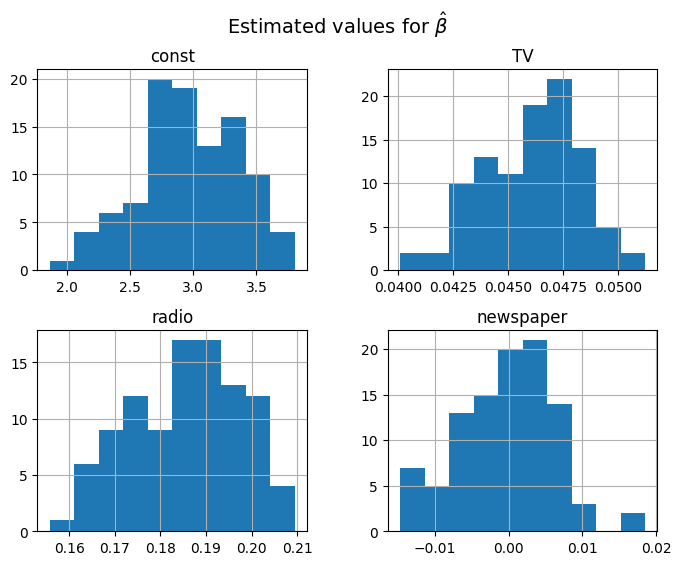

In [9]:
import matplotlib.pylab as plt

n_draws = 100

beta_hats = []
for _ in range(n_draws):
    advertising_df_subsample = advertising_df.sample(100, replace = False)
    X = advertising_df_subsample.loc[:, ["TV", "radio", "newspaper"]]
    y = advertising_df_subsample.loc[:, "sales"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    beta_hats.append(results.params.values)
    
beta_hats_df = pd.DataFrame(np.array(beta_hats), columns=results.params.index)

fig, axs = plt.subplots(2, 2, figsize = (8, 6))
beta_hats_df.hist(ax = axs)
fig.suptitle(r"Estimated values for $\hat{\beta}$" , fontsize=14)
plt.show()

## Modellgüte

Wie gut das Model darin ist, die unabhängige Variable zu erklären, lässt sich am besten im relativen Vergleich sagen. Gute Regressionsmodelle sollten durch die Informationen der unabhängigen Variablen in der Lage sein, bessere Prognosen abzugeben als ein Modell, das nicht auf die Informationen der unabhängigen Variablen zurückgreifen kann. Eine naive Prognose und geeignete Benchmark für ein Regressionsproblem wäre beispielsweise das arithmetische Mittel der Realisierungen der abhängigen Variable $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$. Je besser ein Modell, umso geringer sollten im Durchschnitt die quadrierten oder die absoluten Abweichungen zwischen Realsierung und Prognose sein. Die Prognosen des linearen Regressionsmodells sind durch die geschätzte Regressionsgerade $\boldsymbol{\hat{\beta}}^T \boldsymbol{x}$ gegeben:

Wir definieren den mean-squared-error (MSE):

$$
MSE(\boldsymbol{y}, \boldsymbol{{\hat{y}}}) = \frac{1}{n} \sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2
$$

Als Alternative definieren wir den mean-absolute-error (MAE):

$$
MAE(\boldsymbol{y}, \boldsymbol{{\hat{y}}}) = \frac{1}{n} \sum_{i = 1}^n |y_i - \hat{y}_i|
$$

wobei $\hat{y}$ den prognostizierten Wert repräsentiert, der durch beliebige Modelle generiert werden kann. Im Vergleich wird der MAE weniger stark durch vereinzelte hohe fehlerhafte Prognosen beeinflusst. In beiden Fällen, kann das Verhältnis aus der jeweiligen Metrik für das Regressionmodell und für die unbedingte Prognose (z.B. $\bar{y}$) zu betrachten. Bestimmen wir beispielsweise:

$$
\frac{\sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2}{\sum_{i = 1}^n \left(y_i - \bar{y}\right)^2} 
$$

so ist das Regressionsmodell umso vorteilhafter je kleiner der Wert ist. Dies bedeutet, dass mit dem Modell und dessen Verwendung der unabhängigen Variablen, die Realisierungen besser vorhergesagt (und somit besser erklärt) werden können, als ohne die Information der unabhängigen Variablen. Selbstverständlich können auf diese Weise auch zwei Modelle verglichen werden, die jeweils die Information der unabhängigen Variablen verwenden. Lediglich die alleinige Betrachtung des MSE und der MAE ist normalerweise nicht besonders aussagekräftig, da wir nur wissen, dass ein Wert nahe null ein gutes Zeichen ist. Was jedoch für die Einschätzung von null verschiedener Werte angeht, hängt es stark an der numerischen Reichweite der abhängigen Variable, was als geriner Werte betrachtet werden kann. Daher ist es besser immer eine sinnvolle Benchmark bei der Evaluation des Modells mit einzubeziehen. Für das lineare Regressionsmodell wird oft eine normierte Variante der Gütemessung verwendet, das Bestimmtheismaß $R^2$, welches durch:

$$
R^2 = 1 - \frac{\sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2}{\sum_{i = 1}^n \left(y_i - \bar{y}\right)^2} 
$$

definiert ist. Der Wertebereich liegt zwischen $0$ und $1$, wobei höhere Werte auf eine bessere Erklärungsgüte des linearen Regressionsmodells hinweisen. Ist die Annahme eines linearen Zusammenhangs zwischen den unabhängigen und der abhängigen Variable verletzt, können jedoch auch Werte kleiner $0$ resultieren. Da mit der Aufnahme weiterer unabhängigen Variablen meist die Modellgüte steigt, sollte beim Output der linearen Regression eher das adjustiere Bestimmtheitsmaß verwendet werden, welches diese Eigenschaft korrigiert. 

Neben der quantitativen Modellgüte ist es oft auch sinnvoll, einen Scatterplot zu erzeugen, bei dem Realisierungen auf der x-Achse und die Vorhersagen auf der y-Achse geplottet werden. Ein perfektes Modell würde Punkte entlang einer Diagonalen erzeugen, Punkte oberhalb der Diagonalen repräsentieren Überschätzungen und Punkte unterhalb repräsentieren Unterschätzungen des Modells. Ein weiterer informativer Scatterplot ist die Visualisierungen der Abweichungen $\epsilon = y - \hat{y}$ über alle Beobachtungen. Mit dieser Grafik kann visuell überprüft werden, ob es über die Beobachtungen zu systematischen Abweichungen kommt.

In der unteren Zelle bestimmen wir das Verhältnis der MSE für das lineare Regressionsmodell und $\bar{y}$. Zudem betrachten wir die beiden angesprochenen Grafiken. Insgesamt scheint das Modell die Sales-Werte relativ gut und vor allem wesentlich besser als die unbedingte Prognose $\bar{y}$ zu erklären. Es scheint jedoch, dass das Modell für höhere Sales-Werte bessere Prognosen liefert, als für kleinere Werte und insbesondere Sales-Werte im mittleren Bereich systematisch überschätzt werden. Diese Erkenntnisse deuten an, dass der lineare Zusammenhang zwischen den unabhängigen Variablen und der abhängigen Variable gegebenfalls nicht ganz der Realität entspricht und ein Modell, welches in der Lage ist nicht-lineare Zusammenhänge abzubilden, unter Umständen besser geeignet ist.

The mean squared error ratio of the linear regression model and the arithmetic mean of sales is: 0.1028


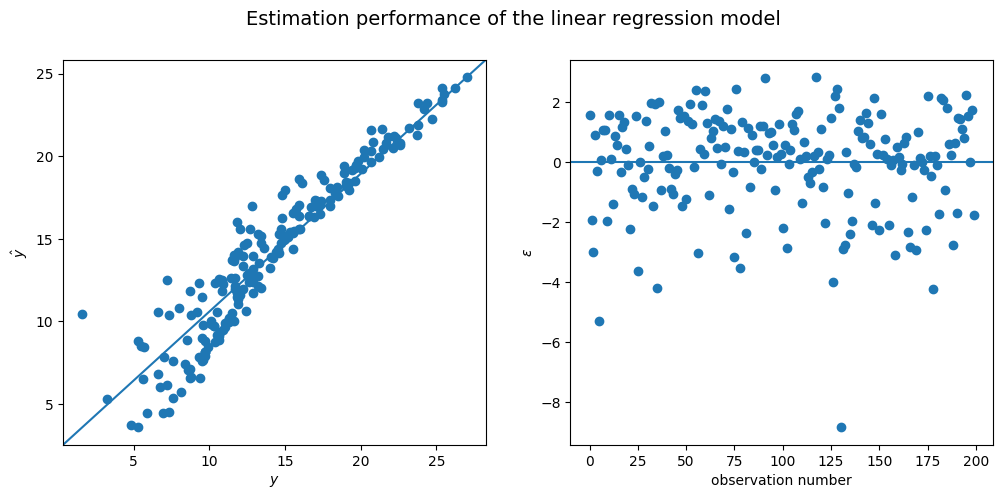

In [10]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt


X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

y_hat = results.predict(X)

mse_model = mean_squared_error(y, y_hat)
mse_benchmark = mean_squared_error(y, [y.mean()]*y.shape[0])

print(f"The mean squared error ratio of the linear regression model and the arithmetic mean of sales is: {mse_model / mse_benchmark:.4f}")

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(y, y_hat)
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes)
axs[0].set_xlabel(r"$y$")
axs[0].set_ylabel(r"$\hat{y}$")
axs[1].scatter(range(advertising_df.shape[0]), y - y_hat)
axs[1].axhline(0)
axs[1].set_xlabel(r"observation number")
axs[1].set_ylabel(r"$\epsilon$")
fig.suptitle(r"Estimation performance of the linear regression model" , fontsize=14)
plt.show()

## Beurteilung der unabhängigen Variablen

Ist das Modell geschätzt und hat man seine Güte für ausreichend befunden, können die Ergebnisse der Parameterschätzung verwendet werden, um die Variablen mit dem größten Einfluss auf die abhängige Variable zu identifizieren. Die geschätzten Parameter des Advertising-Regressionsmodells lauten: $\hat{\beta}_{\text{TV}} = 0.0458$, $\hat{\beta}_{\text{radio}} = 0.1885$, $\hat{\beta}_{\text{newspaper}} = -0.0100$. Anhand dieser Werte würde man zunächst vermuten, dass der größte Einfluss von der Radiowerbung ausgeht, da mit einer Erhöhrung dieser um eine Einheit die größte Erhöhung der abhängigen Variable einhergeht. Hierbei muss jedoch beachtet werden, dass die numerische Reichweite der Realisierungen dieser Variable unter Umständen von denen der anderen abweicht, wodurch die Veränderungen um eine Einheit nicht vergleichbar sind. Betrachten wir die numerische Reichweite der unabhängigen Variablen in der unteren Zelle trifft genau dies zu. Um die geschätzten Parameter und deren Einfluss auf die abhängige Variable wirklich vergleichen zu können, müssen diese zunächst auf vergleichbare Wertebereiche gebracht werden. Wird das Modell mit diesen standardisierten Variablen geschätzt, kann der jeweilige Einfluss der unabhängigen Variable anhand des geschätzten Parameters verglichen werden.

In [11]:
advertising_df.loc[:, ["TV", "radio", "newspaper"]].describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


Im der unteren Zelle schätzen wir das Modell erneut für die standardisierten Werte der unabhängigen Variablen. Die geschätzten Parameter sind: $\hat{\beta}_{\text{TV}} = 3.9193$, $\hat{\beta}_{\text{radio}} = 2.7921$, $\hat{\beta}_{\text{newspaper}} = -0.0225$. Anhand dieser Werte können wir den größten Einfluss durch die TV-Werbung identifizieren, die eine Erhöhung der Verkäufe um $3.9193$ mit sich bringt, wenn die Ausgaben der TV-Werbung um eine Standardabweichung erhört werden.

In [12]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = ["TV", "radio", "newspaper"], index = X.index)

y = advertising_df.loc[:, "sales"]
X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        20:00:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.0

## Variablenselektion

Bisher sind wir davon ausgegangen, dass alle zur Verfügung stehenden Variablen mit in das Modell aufgenommen werden. Dies muss jedoch nicht immer von Vorteil sein. Inbesondere, wenn einzelne unabhängigen Variablen keinen positiven Beitrag zur Verbesserung des Modells beitragen, ist es wenig sinnvoll diese Variablen mit in das Modell aufzunehmen. Zudem kann es auch zu Problemen kommen, wenn unabhängige Variablen stark korreliert sind (Kollinearität). Welche Auswahl ist nun also die beste für das Modell. Bei einer geringen Anzahl an unabhängigen Variablen, können theoretisch Modelle für alle Variablenkombinationen geschätzt und anhand ihrer Güte verglichen werden. Es existieren jedoch für $p$ unabhängige Variablen $2^p$ Kombinationsmöglichkeiten, weshalb man bei diesem Ansatz schnell an die Grenzen der rechenbasierten Umsetzung stößt. In der Praxis wird meist sequentiell vorgegangen, Modelle mit einer Teilmenge aller unabhängigen Variablen bestimmt werden sollen. Dies kann entweder in "forward" oder "backward" Weise durchgeführt. Bei der forward-Selektion startet man mit einem Modell ohne unabhängige Variablen und schätzt Modelle mit jeweils einer Variablen. Die Variable durch die sich die Güte des Modells am stärksten verbessert, wird in das Modell als erstes mit aufgenommen. Im Anschluss werden erneut Modelle mit jeweiliger Hinzunahme einer Variablen ausser der bereits gewählten geschätzt und evaluiert. Mit aufenommen wird wieder die Variable, welche die größte Verbesserung mit sich bringt. Der Prozess wird beendet, wenn durch die erneute Hinzunahme einer Variablen keine signifikante Verbesserung mehr entsteht. Was man unter einer signifikanten Verbesserung verseht, wird durch den Nutzer festgelegt. Bei der backward-Selektion wird im ersten Schritt ein Modell mit allen Variablen geschätzt. Im Anschluss werden Modelle mit dem jeweiligen Weglassen einer Variablen geschätzt. Die Variable, durch deren Weglassen die Modellgüte am wenigsten stark reduziert wird, wird aus dem Modell entfernt. Dieser Prozess wird so oft wiederholt, bis die Reduktion der Modellgüte als zu hoch eingestuft wird.

Als Beispiel betrachten wir die forward-Selektion für den Advertising Datensatz. Als Metrik zur Quantifizierung der Güte verwenden wir das $R^2$. Im ersten Schritt wird die TV-Variable ausgewählt. Als nächstes sehen wir eine Erhöhung des $R^2$ um $0.2853$, wenn die radio-Variable mit in das Modell aufgenommen wird. Eine Aufnahme der newspaper-Variable würde das $R^2$ nicht weiter erhöhen, weshalb man diese Variable nicht in das Modell mit aufnehmen muss.

In [13]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
import numpy as np

variables = ["TV", "radio", "newspaper"]

r2_scores = []
for variable in variables:
    X = advertising_df.loc[:, [variable]]
    y = advertising_df.loc[:, "sales"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    y_hat = results.predict(X)
    r2_scores.append(np.round(r2_score(y, y_hat), 4))

print(f"Variable names: {variables}")
print("R^2 values for univariate regressions:")
print(r2_scores)
print(f"Variable with the highest R^2 value: {variables[np.argmax(r2_scores)]}")
print("Continue with the selection of the next variable:\n")
variables = ["radio", "newspaper"]

r2_scores = []
for variable in variables:
    X = advertising_df.loc[:, ["TV", variable]]
    y = advertising_df.loc[:, "sales"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    y_hat = results.predict(X)
    r2_scores.append(np.round(r2_score(y, y_hat), 4))

print(f"Remaining variable names: {variables}")
print("R^2 values for regressions:")
print(r2_scores)
print(f"Variable with the highest R^2 improvement: {variables[np.argmax(r2_scores)]}")

Variable names: ['TV', 'radio', 'newspaper']
R^2 values for univariate regressions:
[0.6119, 0.332, 0.0521]
Variable with the highest R^2 value: TV
Continue with the selection of the next variable:

Remaining variable names: ['radio', 'newspaper']
R^2 values for regressions:
[0.8972, 0.6458]
Variable with the highest R^2 improvement: radio


## Abweichungen der Modellannahmen

Das lineare Regressionsmodell verwendet relativ viele vereinfachende Annahmen. Wir wollen diese noch einmal abschließend diskutieren, um damit zu sensibilisieren, wodurch falsche Einschätzungen unter Verwendung des linearen Regressionsmodells stammen können. Konkret handelt es sich um folgende Annahmen:

* Linearer Zusammenhang zwichen den unabhängigen und der abhängigen Variable
* Normalverteilung der abhängigen Variable
* Homoskedastizität 
* Unabhängige Fehlerterme
* Geringe Korrelation der unabhängigen Variablen (gerine bzw. keine Multikollinearität)

**Linearer Zusammenhang**

Durch die lineare Regressionsgerade wird ein linearer Zusammenhang zwischen unabhängiger und abhängiger Variable festgelegt. Dies bedeutet, dass die Veränderung einer unabhängigen Variable um eine Einheit immer zu einer konstanten Veränderung der abhängigen Variable führt. Dies ist nicht immer realistisch. Beispielsweise kann man vermuten, dass die Erhöhung für Werbeausgaben ab einem bestimmten Betrag den zusätzlichen Nutzen durch erhöhte Verkaufszahlen verlieren. In diesem Fall wäre es nicht so, dass die Erhöhung der Werbeausgaben immer zur gleichen Erhöhung des Umsatzes führt, sonder die Erhöhung des Umsatzes davon abhängt, wie hoch die Ausgaben für Werbemaßnahmen bereits sind. Eine weitere Annahme des klassischen linearen Regressionsmodells ist, dass die Additivität der unabhängigen Variablen. Dies bedeutet, dass der Einfluss jeder unabhängigen Variable unabhängig von den anderen Variablen ist. Dies ändert sich, wenn beispielsweise Interaktionseffekt mit aufgenommen werden. Bei einem Interaktionseffekt interessiert man sich für Wechselwirkungen des Einflusses mehrerer Variablen. Für das Beispiel des Advertisement-Datensatzes haben wir nach der Variablenselektion gesehen, dass:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \beta_2 x_{\text{radio}} + \epsilon
$$

ein gutes Modell darstellt. Wenn wir den Interaktionsterm mit aufnehmen, verändert sich das Modell zu:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \beta_2 x_{\text{radio}} + \beta_3 x_{\text{TV}} x_{\text{radio}} + \epsilon
$$

Alternativ können wir dieses Modell entweder zu:

$$
y = \beta_0 + \left(\beta_1 + \beta_3 x_{\text{radio}} \right) x_{\text{TV}} + \beta_2 x_{\text{radio}} + \epsilon
$$

oder zu:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \left(\beta_2 + \beta_3 x_{\text{TV}} \right) x_{\text{radio}} + \epsilon
$$
 
umschreiben. Je nach Variante des Modells wird ersichtlich, dass der Einfluss der TV-Werbung bzw. der Radio-Werbung mit von der jeweils anderen Werbeart abghängt und somit die ursprüngliche Charakteristik der Additivität verschwindet. In der unteren Zelle schätzen wir das Modell mit dem Interaktionsterm. Wir sehen anhand des Outputs, dass der Interaktionsterm einen signifikant von null verschiedenen positiven Einfluss hat. Zudem verbessert sich das Bestimmtheitsmaß. Der positive Wert kann so interpretiert werden, dass sich der positive Einfluss einer Werbemaßnahme verstärkt, wenn die andere Werbemaßnahme erhöht wird.


In [14]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt


X = advertising_df.loc[:, ["TV", "radio"]]
X.loc[:, "TV_radio"] = X.TV * X.radio
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          6.68e-146
Time:                        20:00:19   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

Neben der Aufnahme von Interaktionen (und somit der Lockerung der Additivtätsannahme), kann das lineare Regressionsmodell auch angepasst werden, um mögliche nicht-lineare Zusammenhänge abzubilden. Mögliche Lösungen sind durch die Polynome oder durch Splines gegeben. Die Modellierung nicht-linearer Zusammenhänge erfolgt jedoch in einem späteren Kapitel.

**Normalverteilungsannahme**

Bisher haben wir den Unterschied des Regressionmodells:

$$
y = \boldsymbol{\beta}^T \boldsymbol{x} + \epsilon
$$

und der Regressionsgeraden:

$$
y = \boldsymbol{\beta}^T \boldsymbol{x} 
$$

näher diskutiert. Durch die Regressionsgerade wird lediglich der bedingte Erwartungswert für $y$ festgelegt. Bedingt auf die Informationen der unabhängigen Variablen $\boldsymbol{x}$, welchen Wert erwarten wir für $y$. Im traditionellen Regressionsmodell wird jedoch oft auch noch die Annahme getroffen, dass $\epsilon$ normal verteilt ist $\epsilon \sim N(0; \sigma^2)$. Darauf folgt, dass $y$ ebenso normal verteilt ist, $y \sim N(\boldsymbol{\beta}^T \boldsymbol{x} ; \sigma^2)$. Durch das Modell kann also nicht nur der Erwartungswert geschätzt werden, sondern wir können auch Berechnungen für andere Bereiche der Verteilung durchführen. Beispielsweise kann bei gegeben Werten der unabhängigen Variablen bestimmt werden, mit welcher Wahrscheinlichkeit ein bestimmter Wert für $y$ unter- oder überschritten wird. Diese Einschätzungen sind nur dann akkurat, wenn die Normalverteilungsannahme nicht verletzt wrid. Hierfür wird im Output des Modells oft der Jarque-Bera Test mit der Nullhypothese der Normalverteilung ausgegeben. In unserem Beispiel in der Zelle, müsste diese Annahme verworfen werden. Grundsätzlich ist dies für die Schätzung der Parameter weniger problematisch, jedoch sollten keine Aussagen auf Basis der Normalverteilung getroffen werden. Die Annahme der Normalverteilung wird in der Literatur für verschiedene Modelle relativ oft getroffen, obwohl sie in der Realität für empirische Daten oft verworfen werden muss. Die dennoch häufige Verwendung hat oft etwas mit den mathematisch angenehmen Eigenschaften der Normalverteilung zu tun.

**Homoskedastizität**

Die Eigenschaft der Homoskedastizität entsteht aus der Annahme, dass die Varianz aller Residuen gleich ist $\epsilon \sim N(0; \sigma^2)$, wäre dies nicht so, würden sich für einzelne Beobachtungen $i$ die Varianzen $\sigma_i^2$ unterscheiden. In der unteren Zelle sehen Sie ein Beispiel simulierter Daten, deren Varianz mit der unabhängigen Variable größer wird. Der entsprechende Residuenplot ist hier besonders aussagekräftig, da er graphisch gut anzeigt, dass die Abweichungen der Vorhersagen auf unterschiedliche Art schwanken. Die gute Nachricht ist, dass den geschätzten Parametern der Regressionsgerade weiter getraut werden kann, da diese konsistent unverzerrt sind, jedoch sollten beim Vorliegen von Heteroskedastizität auf die statistische Inferenz geachtet werden. Die Standardfehler der Schätzer werden tendenziell unterschätzt, was zu falschen Rückschlüssen führen kann. Möglichkeiten im Umgang mit Heteroskedastizität bestehen in der Anpassung der Standardfehler oder angepassten Schätzverfahren wie dem Weighted-Least-Squares Ansatz, beim dem die Beobachtungen der Lossfunktion invers proportional zu ihrer Varianz gewichtet werden. 


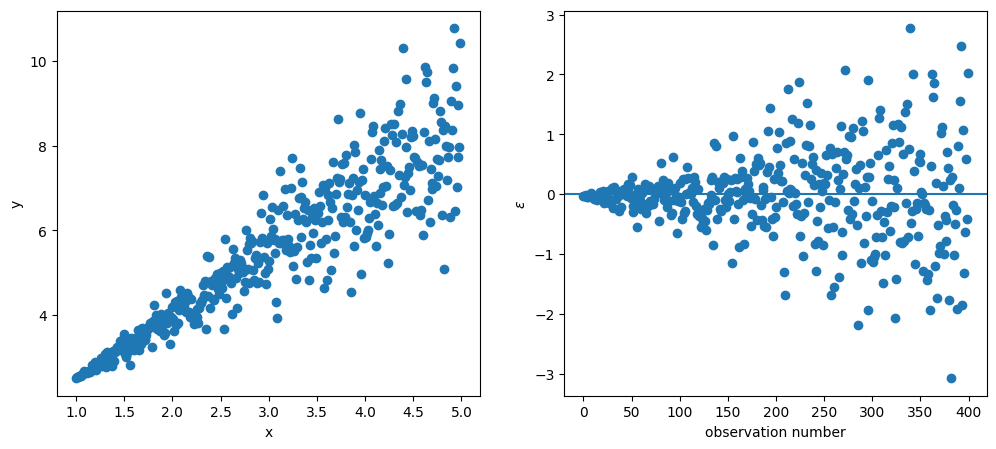

In [15]:
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import pandas as pd


# simulate data
beta_0, beta_1 = 1, 1.5
sigma_c = 1.

x = np.arange(1, 5, 0.01)
y = []
for i in range(len(x)):
    y.append(beta_0 + beta_1 * x[i] + np.random.normal() * sigma_c * 0.003 * (i+1))

df = pd.DataFrame({"x": x, "y": y})
X = df.x
y = df.y
X = sm.add_constant(X)

# estimate model
model = sm.OLS(y, X)
results = model.fit()
epsilon = y - results.predict(X)

# visualize residuals
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(x, y)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].scatter(range(len(df)), epsilon)
axs[1].axhline(0)
axs[1].set_xlabel(r"observation number")
axs[1].set_ylabel(r"$\epsilon$")
plt.show()

**Unabhängige Fehlerterme**

Die Annahme unabhängiger Fehlerterme impliziert, dass keine systematische Zusammenhänge zwischen den Residuen $\epsilon$ der einzelnen Beobachtungen existieren. Diese Annahme ist oft für Zeitreihendaten oder auch Clusterdaten nicht erfüllt. Ähnlich wie beim Vorliegen der Heteroskedastizität betreffen die Konsequenzen in erster Linie die statistische Inferenz, während die Schätzer der Regressionsgeraden asymptotisch unverzerrt bleiben. Der Umgang kann durch Anpassung der Standardfehler oder durch die Aufnahme angepasster Modelle für die Fehlerterme erfolgen. In den Wirtschaftswissenschaften liegen Daten oft als Zeitreihen vor. Hierbei kann oft von null verschiedene Autokorrelation beobachtet werden. Autokorrelation beschreibt den linearen Zusammenhang aufeinander folgender Werte. Die Auto-Kovarianz einer Variablen kann mittels:

$$
\hat{\gamma}(h) = \frac{1}{T} \sum_{t = 1}^{T-h} \left(x_t - \bar{x}\right)\left(x_{t-h}  - \bar{x}\right)
$$

geschätzt werden, wobei $h$ den zeitlichen Abstand der aufeinanderfolgenden Beobachtungen und $T$ die Anzahl der Beobachtungen über die Zeit beschreibt. Wenn Sie diese Formel mit dem Schätzer der Kovarianz zweier Variablen vergleichen, erkennen Sie, dass die Auto-Kovarianz den Zusammenhang mit den eigenen Werten in Abstand von $h$ Zeitpunkten bestimmt. Die normierte Form der Auto-Kovarianz ist die Auto-Korrelation, welche durch:

$$
\hat{\rho}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}
$$

geschätzt werden kann. Dieser Wert ist im Intervall $[-1, 1]$ und kann auf analoge Weise wie die Korrelation nach Bravais-Pearson interpretiert werden. Wird eine von null verschiedene Auto-Korrelation gemessen, bietet es sich an, gegenwärtige Datenpunkte mit Hilfe vergangener Daten zu modellieren.

**Multikollinearität**

Zuletzt kann es problematisch für das Schätzen des linearen Regressionsmodells werden, wenn unabhängige Variable (hohe) Abhängigkeiten aufweisen. Intuitiv wird es auf diese Art schwer die individuellen Einflüsse dieser Variablen getrennt voneinander zu identifizieren. Im Extremfall perfekter linearer Abhängigkeit entstehen zudem auch mathematische Probleme, die das Schätzen unmöglich machen. Es bietet sich daher immer an, im ersten Schritt auf die Korrelationen der unabhängigen Variablen zu achten. In der unteren Zelle sehen Sie die Korrelationsmatrix für unseren Beispielsdatensatz. In diesem Fall ist die Korrelation zwischen den beiden wichtigsten Variablen relativ gering, weshalb für diesen Datensatz der Aspekt der Multikollinearität keine Rolle spielt. Sollten hohe Korrelationen festgestellt werden, könnte eine erste einfache Hilfe sein, eine der stark korrelierten Variablen aus dem Modell zu entfernen. Methodisch kann durch den variance-inflation-factor quantifiziert werden, wie stark die Multikollinearität für den bestehenden Datensatz ausgeprägt ist.

In [16]:
advertising_df.drop(["sales"], axis = 1).corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


## Zusammenfassung

Auch wenn das lineare Regressionsmodell wahrscheinlich in vielen Fällen für die Realität stark vereinfachende Annahmen trifft, ist es didaktisch gesehen ein sehr guter Einstieg in die Modellierung abhängiger Variablen. Wir haben in diesem Kapitel viele Details näher betrachtet und diskutiert, was wir für die kommenden Modelle nicht beibehalten können. Jedoch gilt, dass viele Grundgedanken, wie beispielsweise die gedankliche Unterscheidung des Modells und der Schätzung des bedingten Erwartungswerts, auf die gleiche Weise für andere und zum Teil wesentlich komplexere Modelle bestehen. Die wichtigsten Aspekte dieses Kapitels für diesen Kurs sind:

* wie ist das Modell definiert - hieraus kann abgeleitet werden, welche Art von Zusammenhang zwischen der abhängigen und den unabhängigen Variablen angenommen wird
* wie werden die Parameter des Modells geschätzt - die Verwendung einer Lossfunktion, die unter Veränderung der Parameter minimiert wird ist sehr gängig für viele verschiedene Modelle
* welche Rückschlüsse können anhand des geschätzten Modells gemacht werden - wie gut kann das Modell die Daten erklären, welche Variablen sind wichtig, wie ist deren Einfluss